# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных 
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении


План работы:

- изучение общей информации о данных
- предобработка данных
 - поиск пропусков и замена
 - поиск неявных дубликатов и замена
 - проверка значений на всплески, нелогичные данные
- Исследование параметров
- Общий вывод

### Откройте файл с данными и изучите общую информацию. 

In [41]:
# Ячейка с импортом библиотек, 
# в других ячейках не задавать!
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# Ячейка с c начальными настройками Pandas
pd.set_option('display.max_columns', 50) 
pd.options.mode.chained_assignment = None

In [43]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')


data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Итак, в наборе данных 22 колонки и 23699 строк.
Названия столбцов стандартизированы с учетом змеиного регистра, поэтому, чтобы не нарушать совместимость с исходным файлом данных, переименовывать их не будем.

Согласно описанию данных 
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

Выведем сводный набор гистограмм для каждого из столбцов для оценки распределения значений:

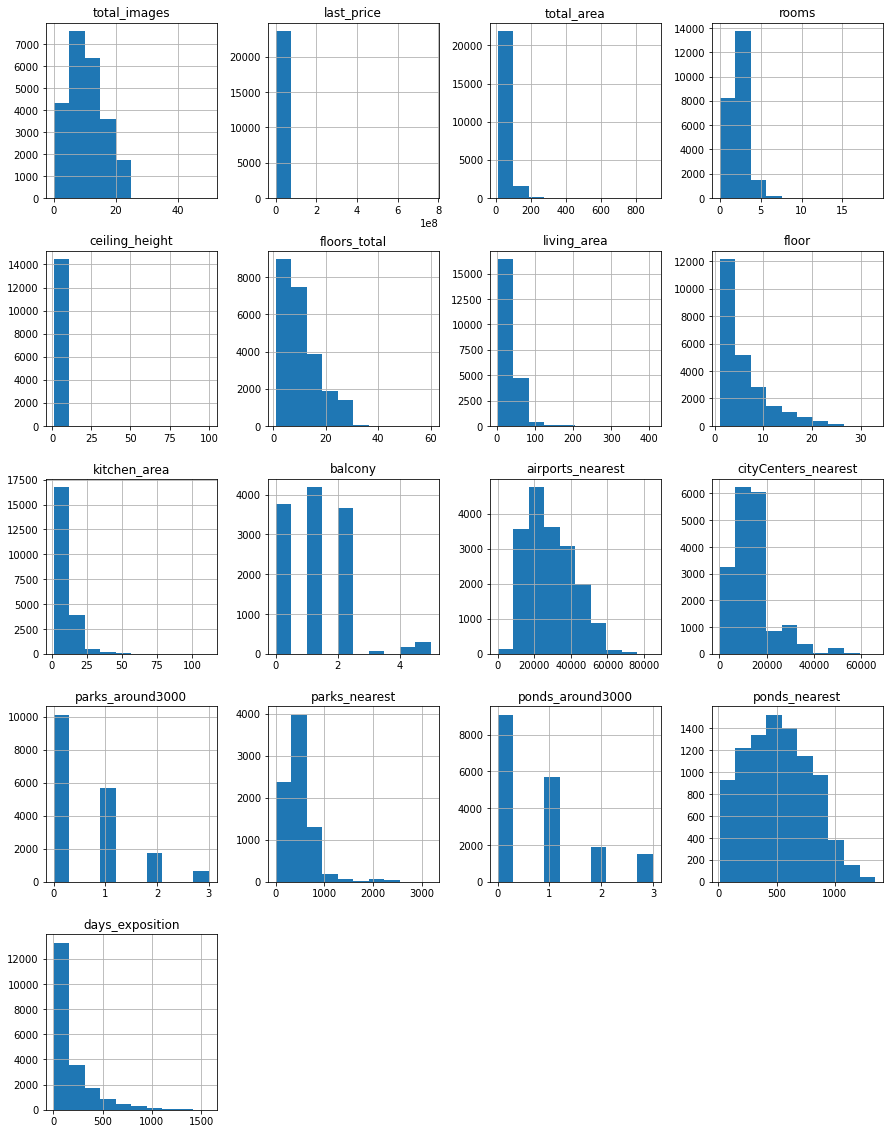

In [44]:
data.hist(figsize=(15, 20));

**Вывод по разделу 1**

- В данных 22 колонки и 23699 строк
- В 14 из 22 колонок есть пропуски
- Распределение данных для количественных значений, судя по гистограммам, в целом соответствует распределению Пуасонна, однако некоторые значения имеют очень широкий диапазон, так что в данных вероятны всплески в крайних значениях, влияющие на общую картину.

data.info()

#data.loc[data['living_area'].isna(), 'living_area'] = data['total_area'] - data['kitchen_area'] - data['balcony']*3
(data.loc[data['living_area'].isna(), 'living_area']) = data.loc[data['living_area'].isna(), 'total_area'] - data.loc[data['living_area'].isna(),'kitchen_area'] - data.loc[data['living_area'].isna(),'balcony']*3
data.info()
display (data.loc[data['living_area'].isna(),'kitchen_area'])

### Предобработка данных

В 14 из 22 столбцах набора данных есть пропуски. Тип данных в 7 из 22 столбцов тоже не совсем соответствует ожидаемому.

Рассмотрим столбцы подробнее, и определим, какие причины пропусков могли быть, и возможно ли заменить их на конкретные значения.

В таблице также учтем тип данных в каждом столбце и требуемый новый тип данных.

Результаты сведем в таблицу:

|Имя столбца|Тип данных|Новый тип данных|Описание данных|Пропуски|Причина|Замена
|:-------------|:-------------|:-------------|:-------------|:-------------|:-------------|:-------------
|airports_nearest|float64|-|расстояние до ближайшего аэропорта в метрах (м)|5542|-|медиана
|balcony|float64|Int64|число балконов|11519|Полностью случайный|0
|ceiling_height|float64|-|высота потолков (м)|9195|-|медиана
|cityCenters_nearest|float64|-|расстояние до центра города (м)|5519|-|медиана
|days_exposition|float64|Int64|сколько дней было размещено объявление (от публикации до снятия)|3181|Не продано|Null
|first_day_exposition|object|DateTime|дата публикации|0|-|-
|floor|Int64|-|этаж|0|-|-
|floors_total|float64|Int64|всего этажей в доме|86|-|медиана
|is_apartment|object|Bool|апартаменты (булев тип)|20924|Полностью случайный|0
|kitchen_area|float64|-|площадь кухни в квадратных метрах (м²)|2278|Неслучайный|Null
|last_price|float64|-|цена на момент снятия с публикации|0|-|-
|living_area|float64|-|жилая площадь в квадратных метрах (м²)|1980|Неслучайный|Null
|locality_name|object|-|название населённого пункта|49|Неслучайный|Null
|open_plan|bool|-|свободная планировка (булев тип)|0|-|-
|parks_around3000|float64|Int64|число парков в радиусе 3 км|5518|Полностью случайный|0
|parks_nearest|float64|-|расстояние до ближайшего парка (м)|15620|Случайный|Null
|ponds_around3000|float64|Int64|число водоёмов в радиусе 3 км|5518|Полностью случайный|0
|ponds_nearest|float64|-|расстояние до ближайшего водоёма (м)|14589|Случайный|Null
|rooms|Int64|-|число комнат|0|-|-
|studio|Bool|-|квартирастудия (булев тип)|0|-|-
|total_area|float64|-|общая площадь квартиры в квадратных метрах (м²)|0|-|-
|total_images|Int64|-|число фотографий квартиры в объявлении|0|-|-

#### Работа с пропусками. Найдем и изучим пропущенные значения в столбцах.

- Такие значения как `число балконов`, `статус "апартаменты"`, `число парков/водоемов`, судя по гистограмме, являются **категориальными**, для них пропуски можно характеризовать как **полностью случайные**, и заменить их на **0**, так как пропуски в этих значениях  вероятнее всего означают остутствие количества рассматриваемой характеристики, т.е. значение равное 0

- Значения с пропусками, характеризующих такие величины как `расстояние до аэропорта`, `высоту потолков` и `количества этажей` являются **количественными**, причина их появления, вероятно, в **невнимательном заполнении объявления**. Их можно заменить на **медианное** значение.

- Значения с пропусками для величин `расстояние до ближайшего парка (м)` и `расстояние до ближайшего водоёма (м)` **количественные** и являются **случайными**, так как зависят от значения в столбце `число парков в радиусе 3 км` и `число водоемов в радиусе 3 км` 
  
  Указанная зависимость подтверждается выборкой, где представлены все объявления со значением `число парков /водоемов в радиусе 3 км` = 0 (или NaN) и `расстояние до ближайшего парка / водоема (м)` больше 0. Рассмотрим ее:

In [5]:
display(
    data.query(
        '((parks_around3000 == 0 or parks_around3000 != parks_around3000) and parks_nearest > 0) \
        or ((ponds_around3000 == 0 or ponds_around3000 != ponds_around3000) and ponds_nearest > 0)')
)

display(
    data.query(
        '((parks_around3000 == 0 or parks_around3000 != parks_around3000) and parks_nearest > 0) \
        or ((ponds_around3000 == 0 or ponds_around3000 != ponds_around3000) and ponds_nearest > 0)')
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1590,3,7500000.0,70.0,2017-07-11T00:00:00,2,NaN,18.0,37.0,13,NaN,False,False,10.0,0.0,Санкт-Петербург,14878.0,9791.0,0.0,3064.0,1.0,264.0,4.0
10959,9,3000000.0,31.1,2017-03-21T00:00:00,1,NaN,5.0,17.7,2,NaN,False,False,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0
19208,17,14950000.0,187.0,2017-10-12T00:00:00,5,3.0,2.0,80.0,2,NaN,False,False,17.0,1.0,Санкт-Петербург,36805.0,8656.0,0.0,3013.0,3.0,537.0,49.0
19430,9,3900000.0,30.5,2018-02-22T00:00:00,1,2.6,5.0,16.5,1,NaN,False,False,5.5,NaN,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1590,3,7500000.0,70.0,2017-07-11T00:00:00,2,NaN,18.0,37.0,13,NaN,False,False,10.0,0.0,Санкт-Петербург,14878.0,9791.0,0.0,3064.0,1.0,264.0,4.0
10959,9,3000000.0,31.1,2017-03-21T00:00:00,1,NaN,5.0,17.7,2,NaN,False,False,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0
19208,17,14950000.0,187.0,2017-10-12T00:00:00,5,3.0,2.0,80.0,2,NaN,False,False,17.0,1.0,Санкт-Петербург,36805.0,8656.0,0.0,3013.0,3.0,537.0,49.0
19430,9,3900000.0,30.5,2018-02-22T00:00:00,1,2.6,5.0,16.5,1,NaN,False,False,5.5,NaN,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0


- 
  Как видно существует только 4 таких объявления, то есть в основной массе, если в объявлении указано 0 или NaN парков в пределах 3000 м то расстояние до ближайших парков 0 или NaN
  
  Таким образом, пропуски в столбцах `расстояние до ближайшего парка (м)` и `расстояние до ближайшего водоёма (м)` мы не меняем, т.е оставляем **пустыми (Null)**, так как 
  
  + Таких пропусков больше половины от общей выборки набора данных
  + Подходящее значение для замены неопределимо, т.к. у нас нет выборки значений расстояния для квартир удаленных от парков/водоемов  


- Существуют **неслучайные** пропуски, например `площадь кухни`, `жилая площадь` и `название населенного пункта` (часть адреса). Такие значение характеризуют непосредственно сам объект недвижимости, и их отсутствие **не объяснить логически**. Эти значения заменим на **пустые (Null)**

Выполним замену значений по принятым правилам:

- для значений в столбцах `airports_nearest`, `ceiling_height`, `cityCenters_nearest`, `floors_total` все `NaN` заполним медианным значением для всего соответствующего столбца

In [6]:
def nan_to_median(column_names):                 # объявим функцию nan_to_median, принимающую в аргументах список со значениями 
    for name in column_names:                    # столбцов и заменяющую все NaN значения в каждом столбце на median
        data[name] = data[name].where(           # Столбцу 'column_name' методом .where
        ~(data[name].isna()),data[name].median() # присвоим значение медианы, если значение в толбце равно NaN
        )                                        # Функция возвращает None, т.е работает как процедура, {привет TurboPascal!}

# вызываем функцию nan_to_median, передаем ей требуемые значения столбцов
nan_to_median(['airports_nearest', 'ceiling_height', 'cityCenters_nearest', 'floors_total']) 

# как вариант можно было пройтись двумя вложенными циклами, вместо выделения функции nan_to_median, но этот вариант немасштабируемый

- для значений в столбцах `balcony`, `is_apartment`, `parks_around3000` и `ponds_around3000` все NaN заполним значением равным 0

In [7]:
def nan_to_zero(column_names):                   # объявим функцию nan_to_zero, принимающую в аргументах список со значениями 
    for name in column_names:                    # столбцов и заменяющую все NaN значения в каждом столбце на 0
        data[name] = data[name].where(           # Столбцу 'column_name' методом .where
        ~(data[name].isna()), 0                  # присвоим значение = 0, если значение в толбце равно NaN
        )                                        # Функция возвращает None, т.е работает как процедура.

# вызываем функцию nan_to_zero, передаем ей требуемые значения столбцов
nan_to_zero(['balcony', 'is_apartment', 'parks_around3000', 'ponds_around3000']) 

Проверим основную информацию о наборе данных:

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В наборе данных остались только 6 столбцов с пропусками, что соответствует принятым в настоящем исследовании правилам.

#### Преобразование типов данных в столбцах. 

Предварительно в сводной таблице были обозначены типы данных столбцов и предложена замена типа данных.

Объясним необходимость замены для каждых отмеченных столбцов:
- столбцы `balcony`, `days_exposition`, `floors_total`, `parks_around3000` и `ponds_around3000` предполагают числовое значение и хранятся в виде десятичных дробей **float64**, хотя по смыслу должны быть целыми числами **Int64**
- столбец `first_day_exposition` изначально представлен значениями в виде **строки**, но по смыслу это **даты**
- столбец `is_apartment` хранит категориальные, буллевы значения но в виде **строк**, т.е. может принимать вид только **Да или Нет**

Приведем типы данных указанных столбцов по принятым правилам:

- для значений в столбцах `balcony`, `days_exposition`, `floors_total`, `parks_around3000` и `ponds_around3000` тип значения *float64* заменим на целочисленное **Int64**:

In [9]:
def float_to_int(column_names):                          # объявим функцию float_to_int, принимающую в аргументах список со значениями 
    for name in column_names:                            # столбцов и заменяющую все float значения в каждом столбце на int
        data[name] = data[name].where(                   # Столбцу 'column_name' методом .where
        ~(data[name].isna()), data[name].astype('int64') # присвоим тип = 'Int64', если значение в толбце НЕ равно NaN
        )                                                # Функция возвращает None, т.е работает как процедура.

# вызываем функцию float_to_int, передаем ей требуемые значения столбцов
float_to_int(['balcony', 'floors_total', 'parks_around3000', 'ponds_around3000'])

- для значений в столбцах `first_day_exposition` тип значения *object (строка)* заменим на формат **DateTime**
- для значений в столбце `is_apartment` тип значения *object (строка)* заменим на формат **Boolean**

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].astype('bool')

Проверим основную информацию о наборе данных и убедимся, что типы данных исправлены как и задумано:

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

#### Удаление неявных дубликатов

Судя по описанию столбцов неявные дубликаты могут быть только в `locality_name ` - назвние населенного пункта. Изучим значения в этих столбцах и удалим неявные дубликаты, затрудняющие категоризацию:

In [12]:
print('Количество уникальных значений в "locality_name":',len(data['locality_name'].unique()))

Количество уникальных значений в "locality_name": 365


365 значений - это много. Можно попытаться отыскать неявные дубликаты вручную, но для начала зменим распространенные в столбце варианты написания типа населенного пункта, для уменьшения количества неявных дубликатов:
- посёлок -> поселок
- городской поселок -> поселок городского типа
- поселок при железнодорожной станции -> поселок станции
- садоводческое некоммерческое товарищество -> садовое товарищество

In [13]:
# создадим новый столбец с копией locality_name для анализа неявных совпадений
data['locality_name_unique'] = data['locality_name']

# Заменим повторяющиеся пробелы, если они присутствуют
data['locality_name_unique'] = data['locality_name_unique'].str.replace('  ', ' ') 

# В столбце locality_name_unique обрежем пробелы в начале и конце строки
data['locality_name_unique'] = data['locality_name_unique'].str.strip()

# Приведем названия типов населенных пунктов к единому виду
data['locality_name_unique'] = data['locality_name_unique'].str.replace('посёлок', 'поселок')
data['locality_name_unique'] = data['locality_name_unique'].str.replace('городской поселок', 'поселок городского типа')
data['locality_name_unique'] = data['locality_name_unique'].str.replace('поселок при железнодорожной станции', 'поселок станции')
data['locality_name_unique'] = data['locality_name_unique'].str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')


wrong_list_dict ={
    'поселок': ['посёлок', 'паселок', 'пслок'],
    'поселок городского типа': ['городской поселок', 'поселок городской', 'пгт'],
    'поселок станции': ['поселок при железнодорожной станции', 'поселок при ж.д'], 
    'садовое товарищество':['садоводческое некоммерческое товарищество', 'cнт']

def wrong_to_correct (wrong_list_dict, column):
    for correct_name, wrong_name_list in wrong_list_dict:
        if data[column].loc[data[column]] in wrong_name_list]
    
    
     

    






# выведем обновленное количество уникальных значений в locality_name_unique
print('Количество уникальных значений в "locality_name_unique" после автоматической замены:',len(data['locality_name_unique'].unique())) 
# и количество проведенных замен
print('Выполнено', len(data['locality_name'].unique()) - len(data['locality_name_unique'].unique()), 'замены после проверки по дубликатам в наименованиях типов населенных пунктов.')

Количество уникальных значений в "locality_name_unique" после автоматической замены: 322
Выполнено 43 замены после проверки по дубликатам в наименованиях типов населенных пунктов.


Дубликаты могут быть также связаны с тем, что один и тот же населенный пункт может называться например и селом и поселком.

Покажем такую выборку и оценим ее.

In [14]:
# Создадим сводную таблицу с уникальными данными из locality_name_unique для дополнительного анализа неявных совпадений
locality_name_unique_pivot = data.pivot_table(index='locality_name_unique', values='last_price', aggfunc='count')

# Переименуем столбцы
locality_name_unique_pivot.columns = ['count']

# Удалим все названия типов населенных пунктов из таблицы locality_name_unique_pivot, для этого
# Создадим список названий типов населенных пунктов, 
# в начале списка разместим "длинные" значения чтобы корректно обработать удаления
locality_name_types = ['поселок городского типа', 'поселок станции', 'коттеджный поселок', 'садовое товарищество', 'поселок', 'деревня', 'село']

# В таблицу locality_name_unique_pivot добавим колонку origin_name c названиями населенных пунктов из индекса.
locality_name_unique_pivot['origin_name'] = locality_name_unique_pivot.index

# В таблицу locality_name_unique_pivot добавим колонку naked_name без названий типов населенных пунктов.
locality_name_unique_pivot['naked_name'] = locality_name_unique_pivot.index

# Вызовем цикл для перебора по списку названий
for name_type in locality_name_types:
    locality_name_unique_pivot['naked_name'] = locality_name_unique_pivot['naked_name'].str.replace(name_type, '')
    
# В столбце naked_name обрежем пробелы в начале и конце строки
locality_name_unique_pivot['naked_name'] = locality_name_unique_pivot['naked_name'].str.strip()
  
# Теперь получим только повторяющиеся значения из таблицы locality_name_unique_pivot по колонке naked_name и оценим результат
locality_name_unique_pivot = locality_name_unique_pivot[locality_name_unique_pivot['naked_name'].isin(
    locality_name_unique_pivot['naked_name'][locality_name_unique_pivot['naked_name'].duplicated()])].sort_values('naked_name')

# Создадим маску с признаками дубля на значения origin_name. Эти данные получены вручную, анализом по Яндекс картам
locality_name_unique_pivot['implicit_duplicate'] = [True, True, False, False, True, True, True, True, True, True, False, False, True, True, True, True, False, False, False, False, True, True, False, False, True, True, False, False, True, True, True, True] 

print('Хотя таких неявных дубликатов не очень много, их можно поправить. Исходя из открытых данных выделим неявные дубликаты:')

pd.set_option('display.max_rows', None) # Уберем ограничение кол-ва выводимых строк для наглядной оценки
display(locality_name_unique_pivot)
pd.set_option('display.max_rows', 10)   # Вернем стандартное ограничение кол-ва выводимых строк

print('Столбец implicit_duplicate содержит признак неявного дубликата. Эти значения получены ручным анализом по Яндекс Картам')

Хотя таких неявных дубликатов не очень много, их можно поправить. Исходя из открытых данных выделим неявные дубликаты:


,count,origin_name,naked_name,implicit_duplicate
locality_name_unique,,,,
деревня Гарболово,13,деревня Гарболово,Гарболово,True
поселок Гарболово,4,поселок Гарболово,Гарболово,True
поселок станции Громово,3,поселок станции Громово,Громово,False
поселок Громово,3,поселок Громово,Громово,False
поселок Зимитицы,3,поселок Зимитицы,Зимитицы,True
деревня Зимитицы,1,деревня Зимитицы,Зимитицы,True
поселок Калитино,1,поселок Калитино,Калитино,True
деревня Калитино,7,деревня Калитино,Калитино,True
Кудрово,173,Кудрово,Кудрово,True


Столбец implicit_duplicate содержит признак неявного дубликата. Эти значения получены ручным анализом по Яндекс Картам


Переименование неявного дубликата будем проводить по правилу: переименуем в то название, для которого есть больше объявлений

In [15]:
# Преобразуем таблицу locality_name_unique_pivot: 
# Оставим в ней только подлежащие переименованию типы населенных пунктов с соответствующим итоговым названием в столбце final_name

locality_name_unique_pivot = locality_name_unique_pivot.merge(
    locality_name_unique_pivot.query('implicit_duplicate == True').merge(
    locality_name_unique_pivot.query('implicit_duplicate == True').pivot_table(
    index='naked_name', values = 'count', aggfunc='max'), on = 'naked_name').query(
    'count_x == count_y').drop(['count_x', 'implicit_duplicate', 'count_y'], axis=1), on='naked_name')

locality_name_unique_pivot.columns=['count', 'origin_name', 'naked_name', 'implicit_duplicate', 'final_name']

pd.set_option('display.max_rows', None)
display(locality_name_unique_pivot)
pd.set_option('display.max_rows', 10)

print('Столбец final_name содержит выбранное имя неявного дубликата.')

,count,origin_name,naked_name,implicit_duplicate,final_name
0,13,деревня Гарболово,Гарболово,True,деревня Гарболово
1,4,поселок Гарболово,Гарболово,True,деревня Гарболово
2,3,поселок Зимитицы,Зимитицы,True,поселок Зимитицы
3,1,деревня Зимитицы,Зимитицы,True,поселок Зимитицы
4,1,поселок Калитино,Калитино,True,деревня Калитино
5,7,деревня Калитино,Калитино,True,деревня Калитино
6,173,Кудрово,Кудрово,True,деревня Кудрово
7,299,деревня Кудрово,Кудрово,True,деревня Кудрово
8,3,поселок Любань,Любань,True,Любань
9,8,Любань,Любань,True,Любань


Столбец final_name содержит выбранное имя неявного дубликата.


Заменим в столбце 'locality_name_unique' основного набора данных выявленные неявные дубликаты:

In [16]:
print('Количество уникальных значений в "locality_name_unique" до замены неявных дубликатов:',len(data['locality_name_unique'].unique())) 

for i in range(len(locality_name_unique_pivot)):
    data['locality_name_unique'] = data['locality_name_unique'].replace(
        locality_name_unique_pivot.loc[i,'origin_name'], locality_name_unique_pivot.loc[i,'final_name'])  

print('Количество уникальных значений в "locality_name_unique" после замены неявных дубликатов:',len(data['locality_name_unique'].unique())) 


Количество уникальных значений в "locality_name_unique" до замены неявных дубликатов: 322
Количество уникальных значений в "locality_name_unique" после замены неявных дубликатов: 312


#### Поиск и устранение редких и выбивающиеся значений

In [17]:
#for column in ['last_price', 'total_area', 'rooms', 'ceiling_height', 'living_area', 'kitchen_area']:
#    plt.subplot(1, 2, 1)
#    data.boxplot(column)
#    plt.show()
#    print(data[column].describe()) 


В разделе 1 мы выводили гистограммы для каждого из столбцов набора данных и ввыводе предположили, что в некоторых столбцах существуют всплески значений.

Покажем такие столбцы:

`last_price`
`total_area`
`rooms`
`ceiling_height`
`living_area`
`kitchen_area`

Рассмотрим каждый из столбцов

Рассмотрим значения в столбце last_price - Стоимость


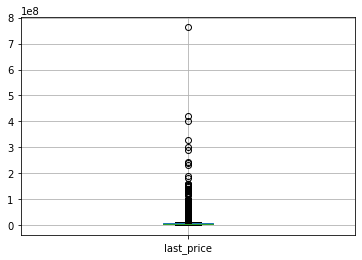

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Самые дорогие объекты (цена более 300 млн)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_unique
12971,19,763000000.0,400.0,2017-09-30,7,2.65,10.0,250.0,10,False,False,False,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,Санкт-Петербург
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,False,False,112.0,0.0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,Санкт-Петербург
14706,15,401300000.0,401.0,2016-02-20,5,2.65,9.0,204.0,9,False,False,False,24.0,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0,Санкт-Петербург
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.0,5,False,False,False,40.0,0.0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0,Санкт-Петербург
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,False,False,70.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0,Санкт-Петербург
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6.0,63.7,6,False,False,False,30.2,0.0,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN,Санкт-Петербург
16461,17,245000000.0,285.7,2017-04-10,6,3.35,7.0,182.8,4,False,False,False,29.8,0.0,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0,Санкт-Петербург
13749,7,240000000.0,410.0,2017-04-01,6,3.40,7.0,218.0,7,False,False,False,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,199.0,Санкт-Петербург
5893,3,230000000.0,500.0,2017-05-31,6,2.65,7.0,NaN,7,False,False,False,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0,Санкт-Петербург


Объекты с площадью 350-450 м, высотой потолков < 3 и расстоянием до центра менее 8 км


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_unique
12971,19,763000000.0,400.00,2017-09-30,7,2.65,10.0,250.0,10,False,False,False,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,Санкт-Петербург
14706,15,401300000.0,401.00,2016-02-20,5,2.65,9.0,204.0,9,False,False,False,24.00,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0,Санкт-Петербург
15151,15,88000000.0,400.00,2019-03-27,9,2.50,2.0,250.0,1,False,False,False,50.00,0.0,Санкт-Петербург,24395.0,2725.0,2.0,315.0,1.0,578.0,NaN,Санкт-Петербург
6183,10,84382000.0,363.10,2018-10-07,3,2.65,16.0,NaN,12,False,False,False,31.73,0.0,Санкт-Петербург,31887.0,4979.0,0.0,NaN,2.0,182.0,NaN,Санкт-Петербург
21990,20,68000000.0,373.10,2018-09-08,8,2.65,8.0,176.2,8,False,False,False,29.40,0.0,Санкт-Петербург,37965.0,7873.0,1.0,562.0,3.0,691.0,234.0,Санкт-Петербург
581,20,65000000.0,365.00,2019-03-18,7,2.90,7.0,NaN,7,False,False,False,NaN,0.0,Санкт-Петербург,19827.0,1690.0,3.0,378.0,3.0,58.0,NaN,Санкт-Петербург
14991,19,45000000.0,413.50,2018-09-20,7,2.65,20.0,74.2,18,False,False,False,13.90,0.0,Санкт-Петербург,18748.0,4341.0,0.0,NaN,0.0,NaN,182.0,Санкт-Петербург
14498,6,32250000.0,374.60,2018-06-09,19,2.65,5.0,264.5,2,False,False,False,27.60,0.0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0,Санкт-Петербург
3676,12,28789000.0,441.98,2019-01-23,4,2.65,6.0,NaN,6,False,False,False,35.05,0.0,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург


Самые дешевые объекты (цена менее 500 тыс.)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_unique
6859,6,490000.0,40.0,2017-12-11,1,2.65,5.0,NaN,3,False,False,False,NaN,0.0,деревня Старополье,26726.0,13098.5,0.0,NaN,0.0,NaN,43.0,деревня Старополье
10782,3,490000.0,29.1,2016-05-05,1,2.50,5.0,17.0,5,False,False,False,5.5,0.0,Сланцы,26726.0,13098.5,0.0,NaN,0.0,NaN,719.0,Сланцы
16032,8,480000.0,32.0,2019-01-06,1,2.65,2.0,16.0,1,False,False,False,NaN,0.0,Сланцы,26726.0,13098.5,0.0,NaN,0.0,NaN,83.0,Сланцы
18867,1,470000.0,41.0,2018-02-11,1,2.65,5.0,32.0,3,False,False,False,9.0,0.0,деревня Выскатка,26726.0,13098.5,0.0,NaN,0.0,NaN,46.0,деревня Выскатка
21912,0,470000.0,37.0,2018-02-18,1,2.65,3.0,NaN,3,False,False,False,NaN,0.0,поселок Совхозный,26726.0,13098.5,0.0,NaN,0.0,NaN,45.0,поселок Совхозный
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17676,0,450000.0,36.5,2018-02-01,1,2.65,5.0,17.3,4,False,False,False,8.5,1.0,деревня Ям-Тесово,26726.0,13098.5,0.0,NaN,0.0,NaN,120.0,деревня Ям-Тесово
16274,18,440000.0,40.0,2018-07-10,1,2.65,5.0,NaN,1,False,False,False,NaN,0.0,деревня Старополье,26726.0,13098.5,0.0,NaN,0.0,NaN,45.0,деревня Старополье
14911,5,430000.0,54.0,2018-06-26,2,2.65,3.0,NaN,3,False,False,False,NaN,0.0,посёлок станции Свирь,26726.0,13098.5,0.0,NaN,0.0,NaN,44.0,поселок станции Свирь
17456,7,430000.0,30.4,2019-04-22,1,2.65,2.0,16.0,1,False,False,False,6.0,0.0,Сланцы,26726.0,13098.5,0.0,NaN,0.0,NaN,NaN,Сланцы


In [18]:
print('Рассмотрим значения в столбце last_price - Стоимость')
data.boxplot('last_price')
plt.show()
print(data['last_price'].describe()) 
print()
print('Самые дорогие объекты (цена более 300 млн)')
display(data.query('last_price > 2e+08').sort_values('last_price', ascending=False))
print('Объекты с площадью 350-450 м, высотой потолков < 3 и расстоянием до центра менее 8 км')
display(data.query('(total_area > 350) and (total_area < 450) and (ceiling_height < 3) and (cityCenters_nearest < 8000)').sort_values('last_price', ascending=False))
print('Самые дешевые объекты (цена менее 500 тыс.)')
display(data.query('last_price < 5e+05').sort_values('last_price', ascending=False))


    

Стоимость только четырех объектов превышает 300 млн руб, причем самый дорогой из них 763 миллиона рублей, хотя схожие по параметрам объекты находятся в диапазоне 28-88 млн руб. 
Вероятно здесь ошибка в цене, прибавлен лишний "0". 

Стоимость самого дешевого объекта также сомнительная. Это можно исправить, вероятно здесь указана цена за м2

In [19]:
data.loc[(data.total_area > 350) & 
         (data.total_area < 450) & 
         (data.ceiling_height < 3) & 
         (data.cityCenters_nearest < 8000) & 
         (data.last_price > 3e+08),'last_price'] /= 10

data.loc[(data.last_price < 1.3e+04),'last_price'] = data.loc[(data.last_price < 1.3e+04),'last_price'] * data.loc[(data.last_price < 1.3e+04),'total_area']

Рассмотрим значения в столбце total_area - Общая площадь


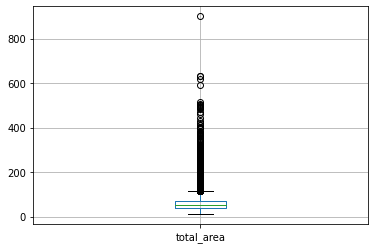

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


In [20]:
print('Рассмотрим значения в столбце total_area - Общая площадь')
data.boxplot('total_area')
plt.show()
print(data['total_area'].describe()) 

Один объект площадью 900 м2. Возможно это многоуровневая квартира, так как находится она на последнем этаже. Сомнительно, что здесь ошибка в площади, так как жилая площадь примерно соответствует и число комнат значительное. Тем не менее такой объект всего один, очевидно, что он уникальный и похожих на него нет. 

Его можно отбросить, его параметры будут влиять на исследования.

Однако перед этим проведем проверку на размер потерь после удаления таких выбросов:

In [21]:
# задаем временную переменную, хранящую долю выброса в выборке
anomaly_part = len(data.loc[(data.total_area > 800)]) / len(data)
print(f'Рассматриваемые выбросы (объекты с площадью более 800 м2) составляют {anomaly_part:.3%} от общей величины выборки.')
print()
if anomaly_part >= 10:
    print('Рассматриваемые выбросы составляют более 10% от общей выборки.\nЗначения этих данных важны для анализа своим количеством, поэтому: \nОСТАВИМ их в выборке')
else:
    print('Рассматриваемые выбросы составляют менее 10% от общей выборки.\nЗначения этих данных искажают результаты исследования их значимость не подтверждена количеством, поэтому:\nУДАЛИМ их из выборки')

Рассматриваемые выбросы (объекты с площадью более 800 м2) составляют 0.004% от общей величины выборки.

Рассматриваемые выбросы составляют менее 10% от общей выборки.
Значения этих данных искажают результаты исследования их значимость не подтверждена количеством, поэтому:
УДАЛИМ их из выборки


In [22]:
data = data.loc[~(data.total_area > 800)]

Рассмотрим значения в столбце rooms - Количество комнат


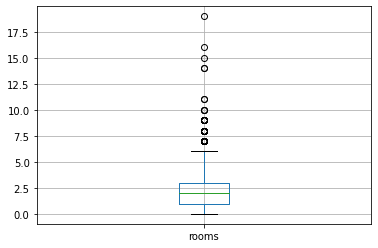

count    23698.000000
mean         2.070217
std          1.076497
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


In [23]:
print('Рассмотрим значения в столбце rooms - Количество комнат')
data.boxplot('rooms')
plt.show()
print(data['rooms'].describe()) 

Здесь очевидно все в порядке, минимум 0 комнат (свободная планировка), максимум 19. Есть часть квартир с большим количеством комнат, они будут участвовать в анализе.

Рассмотрим значения в столбце ceiling_height - Высота потолков


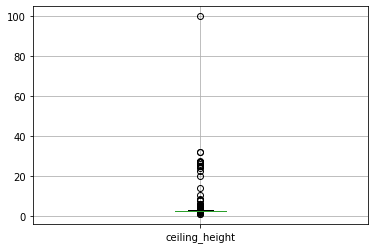

count    23698.000000
mean         2.724355
std          0.988319
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


In [24]:
print('Рассмотрим значения в столбце ceiling_height - Высота потолков')
data.boxplot('ceiling_height')
plt.show()
print(data['ceiling_height'].describe()) 

Объекты с высотой потолков более 20 м выглядят необычными. Скорее всего в этих данных ошибка, и высота указана в дециметрах.

Одно значение явно выбивается: объект с высотой потолка 100 м исключим из выборки.

Для значений высоты в диапазоне 8-20 м нет разумных объяснений. Таких объектов всего 7, поэтому из выборки их исключим.
Высота потолка менее 2 м тоже выглядит подозрительной. Здесь также всего 3 объекта, они исключаются из выборки.

Однако перед этим проведем проверку на размер потерь после удаления таких выбросов:

In [25]:
# задаем временную переменную, хранящую долю выброса в выборке
anomaly_part = len(data.loc[(data.ceiling_height == 100)]) / len(data)
print(f'Рассматриваемые выбросы (объекты с высотой потолка 100 м) составляют {anomaly_part:.3%} от общей величины выборки.')
print()
if anomaly_part >= 10:
    print('Рассматриваемые выбросы составляют более 10% от общей выборки.\nЗначения этих данных важны для анализа своим количеством, поэтому: \nОСТАВИМ их в выборке')
else:
    print('Рассматриваемые выбросы составляют менее 10% от общей выборки.\nЗначения этих данных искажают результаты исследования их значимость не подтверждена количеством, поэтому:\nУДАЛИМ их из выборки')
print()

# задаем временную переменную, хранящую долю выброса в выборке
anomaly_part = len(data.loc[(data.ceiling_height < 2) | (data.ceiling_height >= 8)]) / len(data)
print(f'Рассматриваемые выбросы (объекты с высотой потолка от 8 до 20 м и менне 2 м) составляют {anomaly_part:.3%} от общей величины выборки.')
print()
if anomaly_part >= 10:
    print('Рассматриваемые выбросы составляют более 10% от общей выборки.\nЗначения этих данных важны для анализа своим количеством, поэтому: \nОСТАВИМ их в выборке')
else:
    print('Рассматриваемые выбросы составляют менее 10% от общей выборки.\nЗначения этих данных искажают результаты исследования их значимость не подтверждена количеством, поэтому:\nУДАЛИМ их из выборки')

Рассматриваемые выбросы (объекты с высотой потолка 100 м) составляют 0.004% от общей величины выборки.

Рассматриваемые выбросы составляют менее 10% от общей выборки.
Значения этих данных искажают результаты исследования их значимость не подтверждена количеством, поэтому:
УДАЛИМ их из выборки

Рассматриваемые выбросы (объекты с высотой потолка от 8 до 20 м и менне 2 м) составляют 0.135% от общей величины выборки.

Рассматриваемые выбросы составляют менее 10% от общей выборки.
Значения этих данных искажают результаты исследования их значимость не подтверждена количеством, поэтому:
УДАЛИМ их из выборки


In [26]:
data = data.loc[~(data.ceiling_height == 100)]
data.loc[(data.ceiling_height > 20)]['ceiling_height'] /= 10
data = data.loc[~((data.ceiling_height < 2) & (data.ceiling_height >= 8))]


Рассмотрим значения в столбце living_area - Жилая площадь


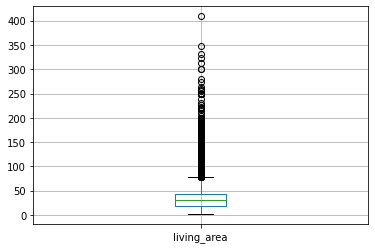

count    21794.000000
mean        34.441573
std         21.883887
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.000000
Name: living_area, dtype: float64


In [27]:
print('Рассмотрим значения в столбце living_area - Жилая площадь')
data.boxplot('living_area')
plt.show()
print(data['living_area'].describe()) 

In [28]:
print('Объекты с жилой площадью более 290 м')
display(data.loc[(data.living_area > 290)])
print('Объекты с жилой площадью менее 7 м')
display(data.loc[(data.living_area < 7)])

Объекты с жилой площадью более 290 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_unique
660,3,49950000.0,483.9,2017-10-04,7,3.20,6.0,312.5,4,False,False,False,26.4,0.0,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0,Санкт-Петербург
4237,1,50000000.0,517.0,2017-10-14,7,2.65,4.0,332.0,3,False,False,False,22.0,0.0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN,Санкт-Петербург
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,False,False,100.0,0.0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0,Санкт-Петербург
8018,20,84000000.0,507.0,2015-12-17,5,4.45,7.0,301.5,7,True,False,False,45.5,1.0,Санкт-Петербург,26726.0,5735.0,2.0,110.0,0.0,NaN,1078.0,Санкт-Петербург
12401,20,91500000.0,495.0,2017-06-19,7,4.65,7.0,347.5,7,False,False,False,25.0,0.0,Санкт-Петербург,26726.0,5735.0,2.0,110.0,0.0,NaN,14.0,Санкт-Петербург
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4.0,322.3,4,False,False,False,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN,Санкт-Петербург
14088,8,51000000.0,402.0,2017-02-07,6,3.15,8.0,300.0,6,False,False,False,56.0,2.0,Санкт-Петербург,24484.0,5052.0,1.0,253.0,0.0,NaN,32.0,Санкт-Петербург


Объекты с жилой площадью менее 7 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_unique
3242,7,4440000.0,41.0,2017-07-02,1,2.65,17.0,3.0,17,False,False,False,11.0,0.0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0,Санкт-Петербург
13915,20,6350000.0,52.0,2018-02-06,2,3.00,6.0,2.0,2,False,False,False,9.0,0.0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0,Санкт-Петербург
16431,13,3799000.0,31.0,2018-04-12,1,2.60,5.0,6.0,1,False,False,False,17.0,0.0,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0,Санкт-Петербург
17582,11,2680000.0,22.0,2018-08-11,0,2.65,25.0,5.0,8,False,True,False,NaN,2.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0,Санкт-Петербург
19251,19,4050000.0,33.0,2018-10-15,1,2.50,22.0,6.5,21,False,False,False,18.0,0.0,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44.0,Санкт-Петербург
21758,0,2330000.0,23.0,2018-01-01,0,2.65,24.0,2.0,22,False,True,False,NaN,0.0,посёлок Мурино,26726.0,13098.5,0.0,NaN,0.0,NaN,66.0,поселок Мурино
21943,15,6100000.0,77.6,2019-02-28,4,2.50,9.0,5.4,1,False,False,False,9.8,0.0,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0,Санкт-Петербург
23574,14,64990000.0,139.0,2015-11-24,3,3.00,8.0,3.0,8,False,False,False,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0,Санкт-Петербург


Значения площади вне границы нормальной выборки объяснимы: существует ряд квартир с большой общей площадью, для них и значение жилой площади будет существенным.

По другому дело обстоит с квартирами, чья жилая площадь менее 7 м2

Эти данные тяжело объяснить, так как такая площадь не характерна для жилой застройки.

Такие объекты не будем включать в окончательную выборку

Однако перед этим проведем проверку на размер потерь после удаления таких выбросов:

In [29]:
# задаем временную переменную, хранящую долю выброса в выборке
anomaly_part = len(data.loc[(data.living_area < 7)]) / len(data)
print(f'Рассматриваемые выбросы (объекты с жилой площадью менее 7 м2) составляют {anomaly_part:.3%} от общей величины выборки.')
print()
if anomaly_part >= 10:
    print('Рассматриваемые выбросы составляют более 10% от общей выборки.\nЗначения этих данных важны для анализа своим количеством, поэтому: \nОСТАВИМ их в выборке')
else:
    print('Рассматриваемые выбросы составляют менее 10% от общей выборки.\nЗначения этих данных искажают результаты исследования их значимость не подтверждена количеством, поэтому:\nУДАЛИМ их из выборки')
print()

Рассматриваемые выбросы (объекты с жилой площадью менее 7 м2) составляют 0.034% от общей величины выборки.

Рассматриваемые выбросы составляют менее 10% от общей выборки.
Значения этих данных искажают результаты исследования их значимость не подтверждена количеством, поэтому:
УДАЛИМ их из выборки



In [30]:
data = data.loc[~(data.living_area < 7)]

Рассмотрим значения в столбце kitchen_area - Площадь кухни


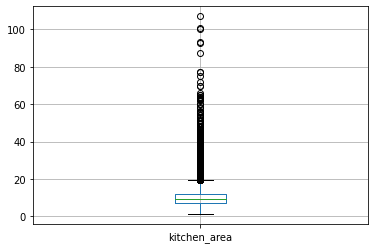

count    21413.000000
mean        10.564239
std          5.865208
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64


In [31]:
print('Рассмотрим значения в столбце kitchen_area - Площадь кухни')
data.boxplot('kitchen_area')
plt.show()
print(data['kitchen_area'].describe()) 

По аналогии со значениями общей площади из общего ряда уберем из выборки квартиру с исключительно малым размером кухни, менее 3 м2. 

Такой объект только один, удалим его из выборки.

Однако перед этим проведем проверку на размер потерь после удаления таких выбросов:

In [32]:
# задаем временную переменную, хранящую долю выброса в выборке
anomaly_part = len(data.loc[(data.kitchen_area <= 3)]) / len(data)
print(f'Рассматриваемые выбросы (объекты с площадью кухни менее 3 м2) составляют {anomaly_part:.3%} от общей величины выборки.')
print()
if anomaly_part >= 10:
    print('Рассматриваемые выбросы составляют более 10% от общей выборки.\nЗначения этих данных важны для анализа своим количеством, поэтому: \nОСТАВИМ их в выборке')
else:
    print('Рассматриваемые выбросы составляют менее 10% от общей выборки.\nЗначения этих данных искажают результаты исследования их значимость не подтверждена количеством, поэтому:\nУДАЛИМ их из выборки')
print()

Рассматриваемые выбросы (объекты с площадью кухни менее 3 м2) составляют 0.076% от общей величины выборки.

Рассматриваемые выбросы составляют менее 10% от общей выборки.
Значения этих данных искажают результаты исследования их значимость не подтверждена количеством, поэтому:
УДАЛИМ их из выборки



In [33]:
data = data.loc[~(data.kitchen_area <= 3)]

**Вывод по разделу 2**

В целом задачи по предобработке выполнены
- Типы данных в столбцах приведены к их значениям
- Заполнены пропуски в данных
- Найдены и исправлены неявные дубликаты
- Числовые значения избавлены от выбросов

### Посчитайте и добавьте в таблицу новые столбцы

Для облегчения категоризации значений, построения выборок добавим в набор данных следующие столбцы:

|Имя столбца|Тип данных|Описание данных
|:-------------|:-------------|:-------------
|sq_metre_price|float64|цена одного квадратного метра
|week_day_exposition|Int64|день недели публикации объявления (0 .. 6)
|first_month_exposition|Int64|месяц публикации объявления
|first_year_exposition|Int64|год публикации объявления
|floor_type|Object|тип этажа квартиры (значения — «первый», «последний», «другой»)
|cityCenters_nearest_km|Int64|расстояние до центра города в километрах

In [34]:
data['sq_metre_price'] = data['last_price'] / data['total_area']
data['week_day_exposition'] =  data['first_day_exposition'].dt.weekday
data['first_month_exposition'] = data['first_day_exposition'].dt.month
data['first_year_exposition'] = data['first_day_exposition'].dt.year

def get_floor_type(row):
    if row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] in [0 ,1]:
        return 'первый'
    return 'другой'

data['floor_type'] = data.apply(get_floor_type, axis=1)

data['cityCenters_nearest_km'] =  (data['cityCenters_nearest'] / 1000).round(0).astype('int64')

data.info()
display(data.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23671 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23671 non-null  int64         
 1   last_price              23671 non-null  float64       
 2   total_area              23671 non-null  float64       
 3   first_day_exposition    23671 non-null  datetime64[ns]
 4   rooms                   23671 non-null  int64         
 5   ceiling_height          23671 non-null  float64       
 6   floors_total            23671 non-null  float64       
 7   living_area             21768 non-null  float64       
 8   floor                   23671 non-null  int64         
 9   is_apartment            23671 non-null  bool          
 10  studio                  23671 non-null  bool          
 11  open_plan               23671 non-null  bool          
 12  kitchen_area            21395 non-null  float6

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_unique,sq_metre_price,week_day_exposition,first_month_exposition,first_year_exposition,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.370370,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок Шушары,82920.792079,1,12,2018,первый,19
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.714286,3,8,2015,другой,14
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176.100629,4,7,2015,другой,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000.000000,1,6,2018,другой,8


**Вывод по разделу 3**

Необходимые столбцы для категоризации и группировки добавлены.

### Исследовательский анализ данных

#### Изучение выбранных параметров объектов

Построим отдельные гистограммы для каждого из следующих параметров:
- `общая площадь`
- `жилая площадь`
- `площадь кухни`
- `цена объекта`
- `количество комнат`
- `высота потолков`
- `этаж квартиры`
- `тип этажа квартиры («первый», «последний», «другой»)`
- `общее количество этажей в доме`
- `расстояние до центра города в метрах`
- `расстояние до ближайшего аэропорта`
- `расстояние до ближайшего парка`
- `день и месяц публикации объявления`


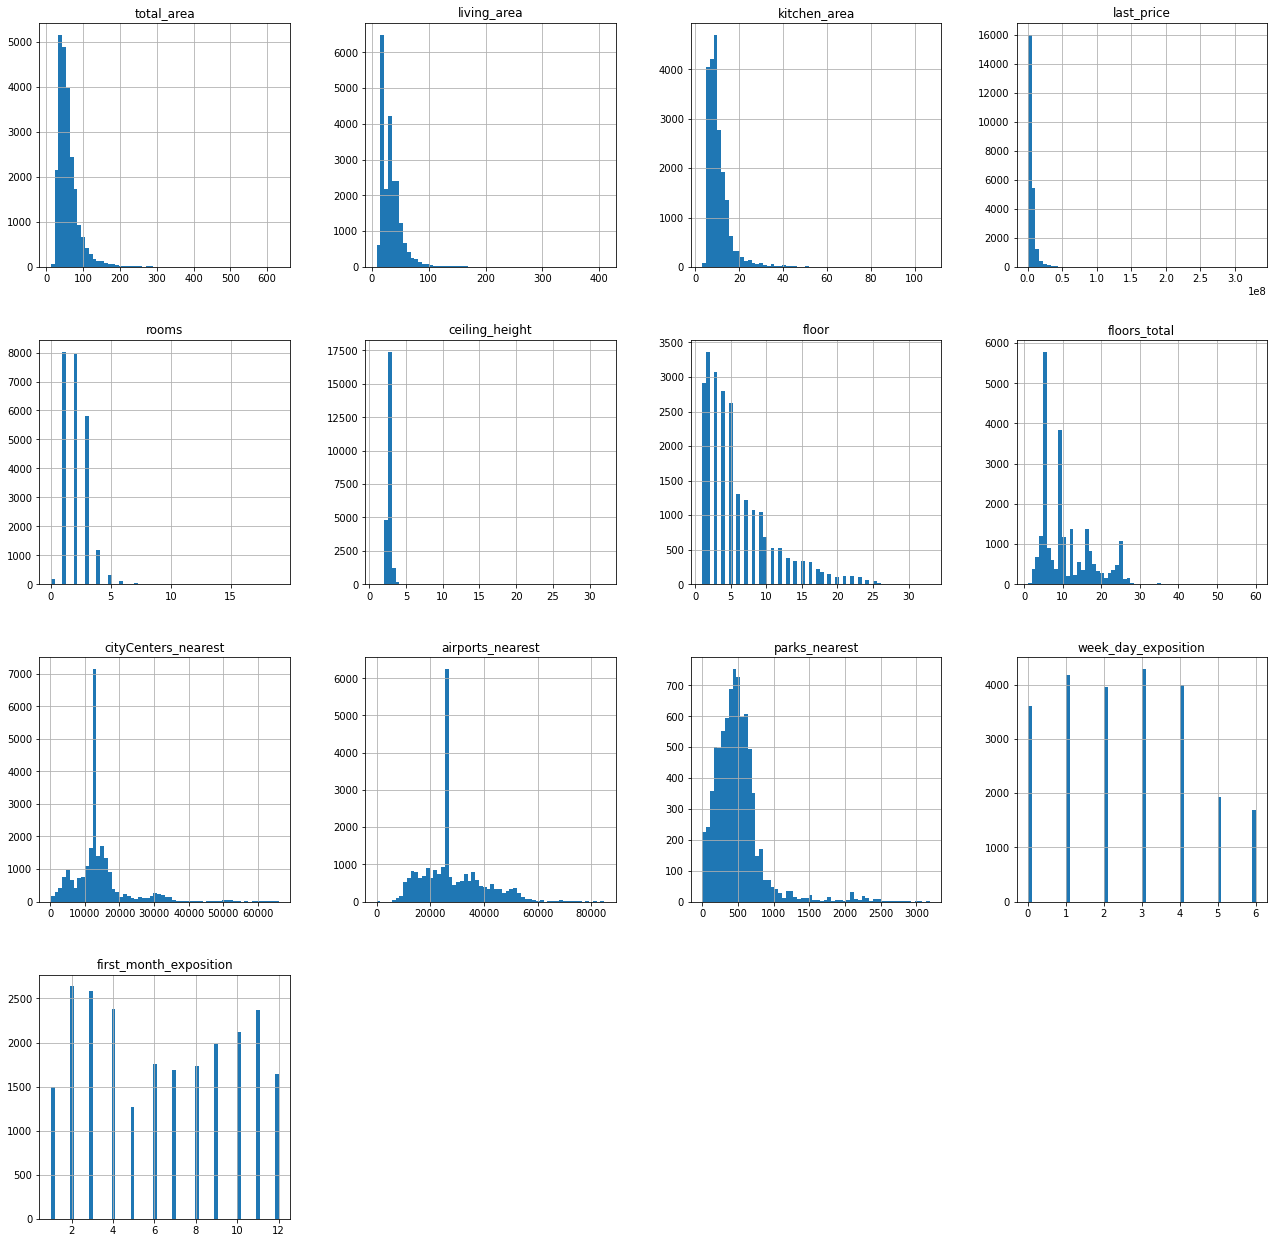

In [35]:
column_list = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 
               'ceiling_height', 'floor', 'floor_type', 'floors_total', 'cityCenters_nearest', 
               'airports_nearest', 'parks_nearest', 'week_day_exposition', 'first_month_exposition']

data[column_list].hist(bins = 60, figsize=(22,22));


Судя по гистограммам видно, что в целом значения для параметров
- общая, жилая площадь и площадь кухни а также цена, количество комнат, высота потолков, этаж и количество этажей соответствуют распределению по Пуасонну, причем:

    - количество 1 и 2 комнатных объектов примерно одинаково для выборки, следом идут 3-комнатные объекты, их на 65% меньше чем количество 1 и 2 комнатных вместе взятых
    - в выборке представлено доминирующее количество объектов на 1-5 этажах. 
    - для количества этажей характерны пиковые всплески в общем ожидаемом распределении, что свидетельтвует о больших количествах зданий с одинаковым количеством этажей (типовая застройка). Есть интересный пик 25-27 этажных домов, видимо связанный с введением в эксплуатацию нового крупного жилого комплекса по типовому проекту.
 
 
- расстояние до центра города, до аэропорта и до парков соответствуют нормальному распределению, причем:

    - для значений расстояния до центра и аэропорта характерны пики у медианных значений, связанные с заменой NaN значений на медианные в предобработке данных
    - для значений расстояния до парков есть гистограмма около нуля показывает значения с NaN, т.к. они не были предобработаны.
    
- гистограммы дня и месяца публикации объявления не коррелируют со временем

    - для публикаций в течение недели характерна низкая активность в выходные, и высокая - в будни. Причем вторник и среда наиболее распространенные дни публикаций
    - для публикаций по месяцам характерна сехонная зависимость. Пики публикаций приходятся на начало весны и конец осени. С мая по июль продолжается сезонный спад, затем повышение количества публикаций равномерно к ноябрю. Декабрь и январь - аналогичны летнему спаду

#### Оценка распределения времени продажи квартиры

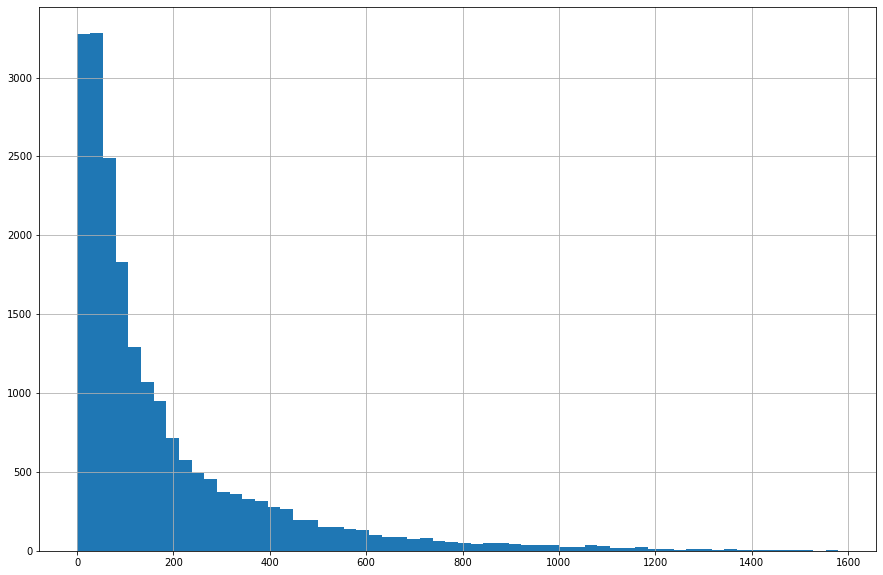

count    20491.000000
mean       180.992777
std        219.828477
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


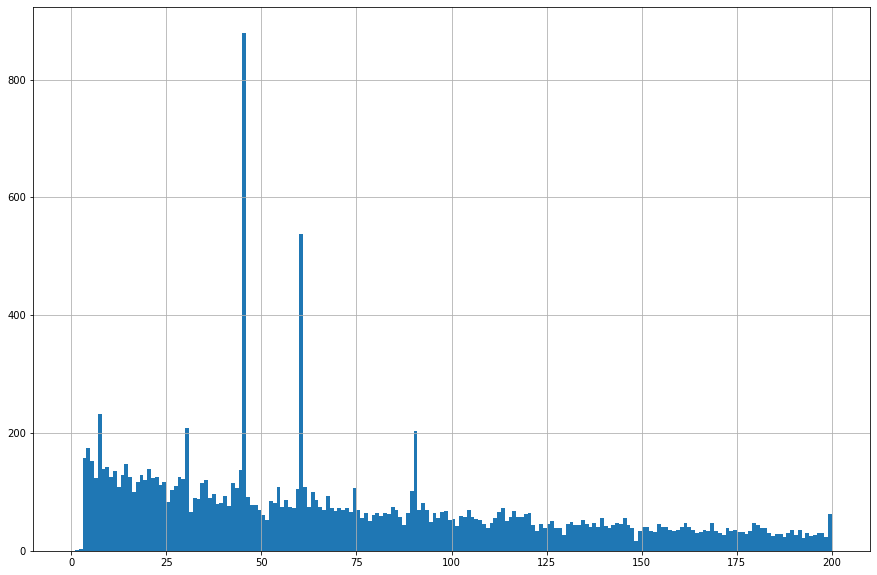

In [36]:
data['days_exposition'].hist(bins = 60, figsize=(15,10));
plt.show()
print(data['days_exposition'].describe()) 
data['days_exposition'].hist(bins = 200, range=(0, 200), figsize=(15,10));


Время продажи принимает вид распределения по Пуассону.

Среднее время продажи: 186 дней, медиана 102 дня.
Необычнайно долгими можно считать продажи, выходящие за границы нормальных значений, продолжающиеся более 530 дней, т.е примерно 1.5 года.
Быстрые продажи вообще характерны для распределения. Их число велико в общей выборке.

Если увеличить масштаб гистограммы, видно что пик продаж приходится на 45 и 60 день. Вероятно это связано с автоматическим закрытием объявлений, или ручным снятием объявления продавцом после первого и второго месяца.

Продажи в 1 и 2 день очень редки. Их можно считать необычайно быстрыми.

#### Изучение факторов влияющих на общую (полную) стоимость объекта.

Посмотрим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

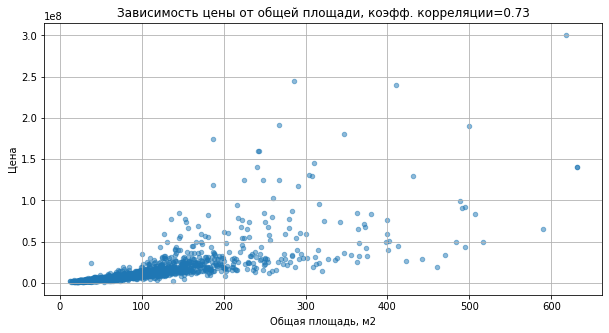

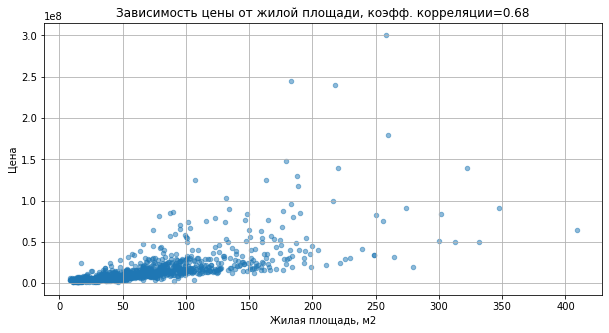

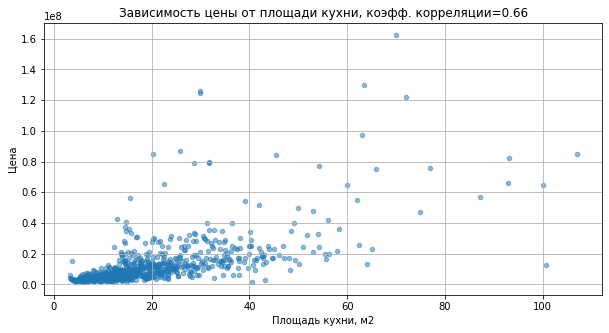

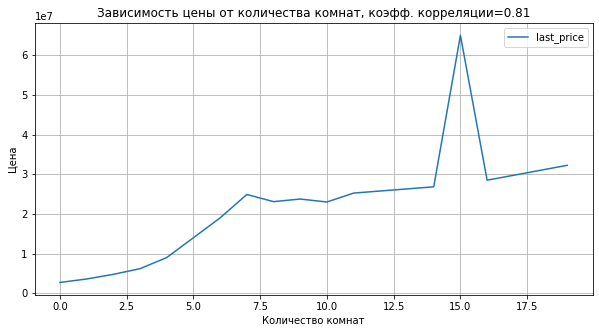

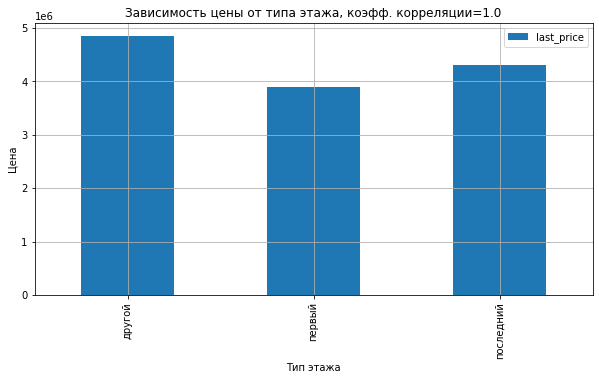

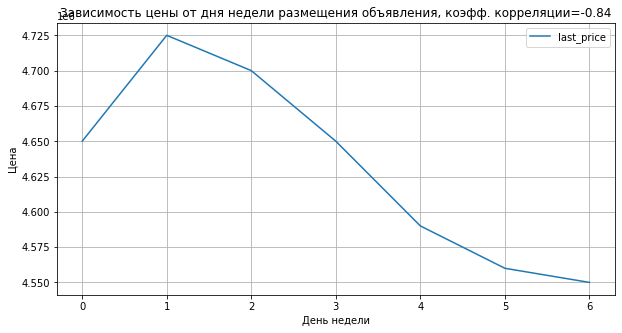

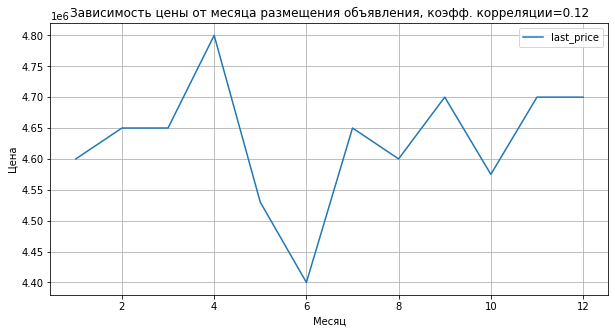

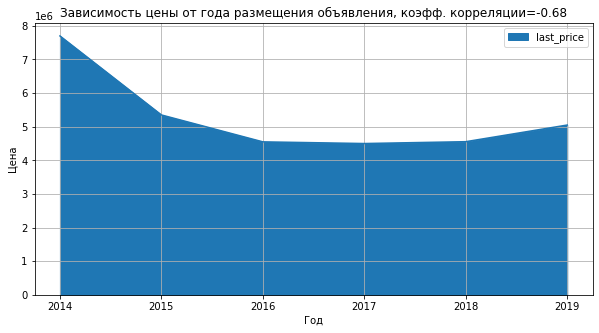

In [37]:
def scatter_show(x_values, y_values, x_label, y_label, title, knd='scatter', aggf=['median'], alpha_value=0.5, grid_value=1):
    
    if knd =='scatter': alpha_value = 0.5
    elif knd in ['hist', 'line', 'bar', 'area']: alpha_value = 1
      
    data_pivot_temp = data.pivot_table(index = x_values, values = y_values, aggfunc = aggf).reset_index()
    data_pivot_temp.columns = [x_values, y_values]
    correlation = data_pivot_temp.corr().reset_index().loc[0,'last_price'].round(2).astype(str)
    data_pivot_temp.plot(x=x_values, y=y_values, kind=knd, alpha=alpha_value, grid=grid_value, figsize=(10, 5))
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title + ', коэфф. корреляции=' + correlation)
    plt.show;
    
    #display(correlation.loc[0,'last_price'])

scatter_show('total_area', 'last_price', 'Общая площадь, м2', 'Цена', 'Зависимость цены от общей площади')
scatter_show('living_area', 'last_price', 'Жилая площадь, м2', 'Цена', 'Зависимость цены от жилой площади')
scatter_show('kitchen_area', 'last_price', 'Площадь кухни, м2', 'Цена', 'Зависимость цены от площади кухни')
scatter_show('rooms', 'last_price', 'Количество комнат', 'Цена', 'Зависимость цены от количества комнат', 'line')
scatter_show('floor_type', 'last_price', 'Тип этажа', 'Цена', 'Зависимость цены от типа этажа','bar')
scatter_show('week_day_exposition', 'last_price', 'День недели', 'Цена', 'Зависимость цены от дня недели размещения объявления', 'line')
scatter_show('first_month_exposition', 'last_price', 'Месяц', 'Цена', 'Зависимость цены от месяца размещения объявления', 'line')
scatter_show('first_year_exposition', 'last_price', 'Год', 'Цена', 'Зависимость цены от года размещения объявления', 'area')

Исходя из данных графиков на общую цену объекта влияет,
- общая площадь, в большей степени среди прочих площадей
- количество комнат, наравне с общей площадью. Причем эта зависимость выражена более явно для 1..7 комнат
- день недели подачи объявления, во вторник - самые высокие цены, к пятнице они снижаются
- месяц подачи корреирует слабо, но есть зависимость от сезона
- год подачи коррелирует отрицательно, однако есть тенденция к повышению цен с 2018 года
- для типа этажа корреляция не определена, так как эти значения не числовые. Но связь можно увидеть, первый этаж в среднем на 20% дешевле чем другой 

#### Cредняя цена одного квадратного метра в населённых пунктах с наибольшим числом объявлений. 

Построим таблицу, куда войдут 10 населенных пунктов с самым большим числом объявлений (столбец `count`)

In [38]:
data_pivot_temp = data.pivot_table(index='locality_name_unique', values='sq_metre_price', aggfunc=['count','mean'])
data_pivot_temp.columns = ['count', 'mean']
data_pivot_temp = data_pivot_temp.sort_values('count', ascending=False).head(10)
data_pivot_temp


,count,mean
locality_name_unique,,
Санкт-Петербург,15698,114605.128798
поселок Мурино,587,85993.869739
деревня Кудрово,472,95324.930544
поселок Шушары,440,78677.364217
Всеволожск,398,68654.473986
Пушкин,368,103081.147013
Колпино,338,75424.579098
поселок Парголово,327,90175.913458
Гатчина,307,68746.146763


Для оценки значений средней цены квадратного метра в указанных 10 населенных пунктах, графически отобразим основные статичтические данные этой выборки: 

- построим диаграмму размаха и выведем соответствующие значения в текстовом виде
- построим столбчатую диаграмму со значениями средней стоимости квадратного метра



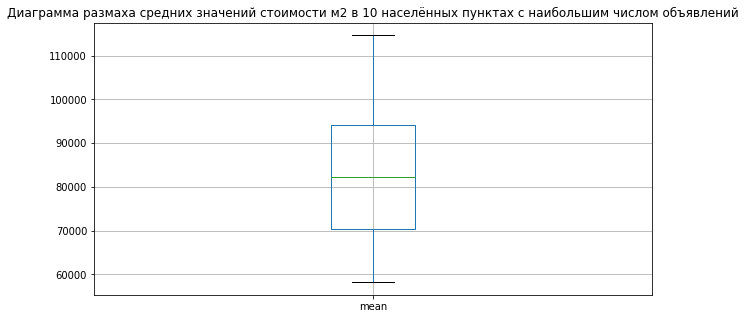

count        10.000000
mean      83882.546277
std       17351.503190
min       58141.909153
25%       70415.754847
50%       82335.616978
75%       94037.676272
max      114605.128798
Name: mean, dtype: float64


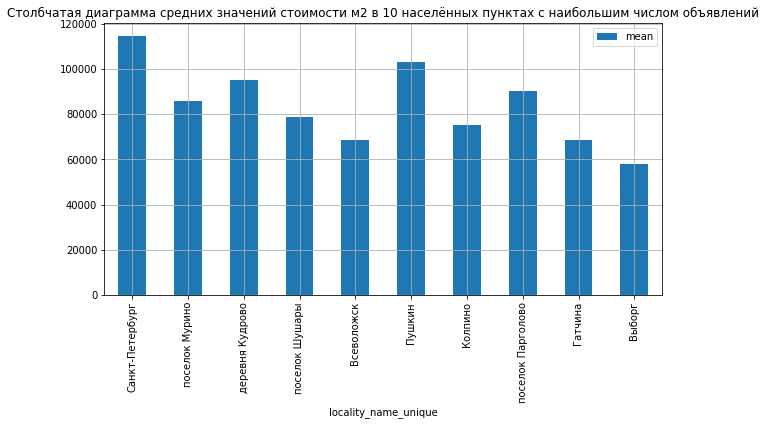

In [39]:
data_pivot_temp[['mean']].boxplot(figsize=(10, 5))
plt.title('Диаграмма размаха средних значений стоимости м2 в 10 населённых пунктах с наибольшим числом объявлений')
plt.show()
print(data_pivot_temp['mean'].describe()) 
data_pivot_temp.plot(y='mean', kind='bar', grid=1, figsize=(10, 5))
plt.title('Столбчатая диаграмма средних значений стоимости м2 в 10 населённых пунктах с наибольшим числом объявлений')
plt.show()


**Вывод по средней цены одного квадратного метра в населённых пунктах с наибольшим числом объявлений**

В столбце `mean` показана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

- **самая высокая** стоимость квадратного метра в этой выборке у населенного пункта **"Санкт-Петербург"**

- **самая низкая** стоимость квадратного метра в этой выборке у населенного пункта **"Выборг"**

В выборке отсутствуют выбросы: Все значения лежат в диапазоне нормальных значений.

#### Расчет средней цены каждого километра от центра города


Построим сводную таблицу со средней ценой для объектов с известным расстоянием до центра в Санкт-Петербурге.

То есть, среднюю стоимость объекта для каждого "километра".

,cityCenters_nearest_km,last_price
0,0,3.144912e+07
1,1,2.120672e+07
2,2,1.662326e+07
3,3,1.112658e+07
4,4,1.232999e+07
...,...,...
25,25,4.052840e+06
26,26,3.973013e+06
27,27,8.300000e+06
28,28,5.026429e+06


Коэффциент корреляции равен  -0.75


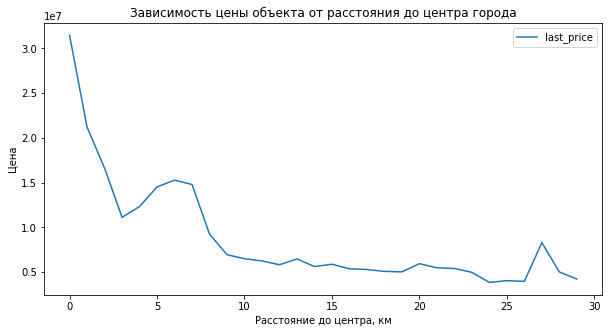

In [40]:
data_pivot_temp = data.query('locality_name_unique == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='last_price').reset_index()

display(data_pivot_temp)
print('Коэффциент корреляции равен ', data_pivot_temp.corr().reset_index().loc[0,'last_price'].round(2).astype(str))

data_pivot_temp.plot('cityCenters_nearest_km', 'last_price', kind='line', figsize=(10, 5))
plt.ylabel('Цена')
plt.xlabel('Расстояние до центра, км')
plt.title('Зависимость цены объекта от расстояния до центра города')
plt.show;


- Зависимость средней цены от расстояния соответствует распределению Пуассона

- **Корреляция отрицательная**, при увеличении расстояния цена снижается.

- Присутствуют **пики на расстоянии 5-7 км и 26-28 км**, связанные вероятно с географическими зонами с дорогой застройкой, расположенными на соответствующем расстоянии от центра.

- Для расстояний **в диапазоне 0-4 км характерна сильная зависимость**, цена падает при увеличении расстояния достаточно быстро по сравнению с другими диапазонами. Это связано с наличием сверхдорогой недвижимости близко к центру (0-1 км), и меньшим ее количеством на расстоянии 2-4 км
- Для **диапазона 10-25 км зависимость слабо выраженная** по сравнению с диапазоном близким к центру города. Это связано с наличием общирного "кольца" спальных районов вокруг центра

**Вывод по разделу 4**

Были проведены исследования по значениям параметров объектов

- проверены результаты предобработки данных
- оценено, как быстро продавались объекты, и выявлен нормальный диапазон значения дней продажи: 3-530 дней
- изучены факторы, влияющие на цену объекта, выявлены наиболее значимые факторы, такие как: общая площадь, количество комнат, день недели подачи объявления и тип этажа: первый, последний или другой
- Найдена средняя цена для каждого из 10 населенных пунктов с наибольшим числом объявлений. Среди них максимальная цена за кв.м в Санкт-Петербурге, минимальная в Выборге
- Определена зависимость средней цены объекта недвижимости от расстояния до центра. 

### Общий вывод

# Источник данных
Рассматриваемый набор данных представляет собой выборку из 23699 объявлений о продаже недвижимости полученную из **Яндекс.Недвижимость**

# Предобработка данных

#### Сводная таблица с описанием данных, методами и результатами предобработки:

Параметр|Описание данных|Тип данных|Изменение типа данных||Кол-во пропусков в исходных данных|Метод замены пропусков
:-------------|:-------------|:-------------|:-------------||:-------------|:-------------
airports_nearest|расстояние до ближайшего аэропорта в метрах (м)|float64|-||5542|Медианное значение
balcony|число балконов|float64|Int64||11519|Замена на 0
ceiling_height|высота потолков (м)|float64|-||9195|Медианное значение
cityCenters_nearest|расстояние до центра города (м)|float64|-||5519|Медианное значение
days_exposition|сколько дней было размещено объявление (от публикации до снятия)|float64|Int64||3181|Пропуски не удалялись
first_day_exposition|дата публикации|object|DateTime||0|-
floor|этаж|Int64|-||0|-
floors_total|всего этажей в доме|float64|Int64||86|Медианное значение
is_apartment|апартаменты (булев тип)|object|Bool||20924|Замена на 0
kitchen_area|площадь кухни в квадратных метрах (м2)|float64|-||2278|Пропуски не удалялись
last_price|цена на момент снятия с публикации|float64|-||0|-
living_area|жилая площадь в квадратных метрах (м2)|float64|-||1980|Пропуски не удалялись
locality_name|название населённого пункта|object|-||49|Пропуски не удалялись
open_plan|свободная планировка (булев тип)|bool|-||0|-
parks_around3000|число парков в радиусе 3 км|float64|Int64||5518|Замена на 0
parks_nearest|расстояние до ближайшего парка (м)|float64|-||15620|Пропуски не удалялись
ponds_around3000|число водоёмов в радиусе 3 км|float64|Int64||5518|Замена на 0
ponds_nearest|расстояние до ближайшего водоёма (м)|float64|-||14589|Пропуски не удалялись
rooms|число комнат|Int64|-||0|-
studio|квартирастудия (булев тип)|Bool|-||0|-
total_area|общая площадь квартиры в квадратных метрах (м2)|float64|-||0|-
total_images|число фотографий квартиры в объявлении|Int64|-||0|-

#### Замена неявных дубликатов:

Неявные дубликаты были обнаружены в параметре `locality_name` (название населённого пункта) и были заменены по следующим правилам:

- посёлок -> поселок
- городской поселок -> поселок городского типа
- поселок при железнодорожной станции -> поселок станции
- садоводческое некоммерческое товарищество -> садовое товарищество

Кроме того, был произведен полуавтоматический поиск совпадающих названий населенных пунктов, но с разными типами населенных пунктов, например `поселок Зимитицы` и `деревня Зимитицы`. Дубликаты, подтверждённые данными с карт, были приведены к единому значению.

#### Оценка и исключение  редких и выбивающихся значений:

Параметр|Описание данных|Выбросы данных|Процент выбросов|Метод замены выбросов|Причина выбора метода
:-------------|:-------------|:-------------|:-------------|:-------------|:-------------
last_price|цена на момент снятия с публикации|Цена более 300 млн.|0.017%|Уменьшение значения в 10 раз|Сравнение со схожими по хар-кам объектами
last_price|цена на момент снятия с публикации|Цена менее 13 тыс.|0.004%|Изменение значения|Это цена за квадратный метр
total_area|общая площадь квартиры в квадратных метрах (м2)|Площадь более 800 м2|0.004%|Удаление объектов|Выборка с выбросами мала
rooms|число комнат|не выявлены|-|-|-
ceiling_height|высота потолков (м)|Высота потолка 100 м|0.004%|Удаление объектов|Выборка с выбросами мала
ceiling_height|высота потолков (м)|Высота потолка от 8 до 20 м|0.135%|Удаление объектов|Выборка с выбросами мала
ceiling_height|высота потолков (м)|Высота потолка более 20 м|0.135%|Уменьшение значения в 10 раз|Изначальное значение в дециметрах
living_area|жилая площадь в квадратных метрах (м2)|Жилая площадь менее 7 м2|0.034%|Удаление объектов|Выборка с выбросами мала
kitchen_area|площадь кухни в квадратных метрах (м2)|Пощадь кухни менее 3 м2|0.076%|Удаление объектов|Выборка с выбросами мала


# Цели проекта
>Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

Исходя из задач проекта, по результатам его выполнения были выбраны следующие параметры, позволяющие выявлять нехарактерные значения:

параметр|описание данных| коэффициент корреляции c ценой 
:-------------|:-------------|:-------------
total_area|общая площадь квартиры в квадратных метрах (м?)|0.72
rooms|число комнат|0.78
week_day_exposition|день недели публикации объявления (0 .. 6)|0.82
first_month_exposition|месяц публикации объявления|0.19
floor_type|тип этажа квартиры (значения: "первый", "последний", "другой")|n/a
cityCenters_nearest|расстояние до центра города (м)|-0.74
days_exposition|сколько дней было размещено объявление (от публикации до снятия)|0.15


### Выводы по каждым выбранным параметрам


- `total_area` - общая площадь квартиры в квадратных метрах (м²)
 - Наибольшая связь с ценой среди всех прочих параметров площадей.
- `rooms` - число комнат
 - Связь с ценой выражена более явно для 1..7 комнат
 - Количество 1 и 2 комнатных объектов примерно одинаково для выборки, следом идут 3-комнатные объекты, их на 65% меньше чем количество 1 и 2 комнатных вместе взятых
- `week_day_exposition` - день недели публикации объявления (0 .. 6)
 - Во вторник - самые высокие цены, к пятнице они снижаются
 - Для публикаций в течение недели характерна низкая активность в выходные, и высокая - в будни. Причем вторник и среда наиболее распространенные дни публикаций
- `first_month_exposition` - месяц публикации объявления
 - В июне и октябре самые низкие цены, в апреле, сентябре и декабре - самые высокие
 - для публикаций по месяцам характерна сезонная зависимость. Пики публикаций приходятся на начало весны и конец осени. С мая по июль продолжается сезонный спад, затем повышение количества публикаций равномерно к ноябрю. Декабрь и январь - аналогичны летнему спаду
- `floor_type` - тип этажа квартиры (значения — «первый», «последний», «другой»)
 - Первый этаж в среднем на 20% дешевле чем другой
- `cityCenters_nearest` - расстояние до центра города (м)
 - цена снижается с увеличением расстояния
 - Присутствуют пики на расстоянии 5-7 км и 26-28 км, связанные вероятно с географическими зонами с дорогой застройкой, расположенными на соответствующем расстоянии от центра.
 - Для расстояний в диапазоне 0-4 км характерна сильная зависимость, цена падает при увеличении расстояния достаточно быстро по сравнению с другими диапазонами. Это связано с наличием сверхдорогой недвижимости близко к центру (0-1 км), и меньшим ее количеством на расстоянии 2-4 км
 - Для диапазона 10-25 км зависимость слабо выраженная по сравнению с диапазоном близким к центру города. Это связано с наличием общирного "кольца" спальных районов вокруг центра